In [2]:
import matplotlib.pyplot as plt
import torch
from CNN.CNN import SE_CNN
from Transformer.Transformer import PerceiverIO
import os
from torchvision import transforms
from PIL import Image
%matplotlib inline

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
CNN_snapshots = os.listdir("/home/hvgupta/FYP/AI-Model/TrainedWeights/CNN")
Transformer_snapshots = os.listdir("/home/hvgupta/FYP/AI-Model/TrainedWeights/Transformer")
CNN_snapshots.sort(key=lambda x: int(x.split(".")[0]))
Transformer_snapshots.sort(key=lambda x: int(x.split(".")[0]))

print(CNN_snapshots)
print(Transformer_snapshots)

model_CNN = SE_CNN(3,64,
                64, 8).to(device)
model_Transformer = PerceiverIO(128, 
                    256, 
                    8, 32, 16,
                    512).to(device)

['2.pth', '4.pth', '8.pth', '12.pth', '16.pth', '20.pth', '24.pth', '28.pth', '32.pth', '36.pth', '40.pth', '44.pth']
['4.pth', '8.pth', '12.pth', '16.pth', '20.pth', '24.pth', '28.pth', '32.pth', '36.pth', '40.pth', '44.pth', '48.pth', '52.pth', '56.pth', '60.pth', '64.pth', '68.pth', '72.pth', '76.pth', '80.pth', '84.pth', '88.pth', '92.pth', '96.pth', '100.pth']


In [5]:
transformer = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    transforms.Lambda(lambda x: x.to(device))
])
TEST_imagesPath = "../TestImages" 

In [6]:
os.listdir(TEST_imagesPath)

['img2.jpg', 'img1.jpg']

Image : img2.jpg
 CNN file 2.pth : ['278.91', '67.47', '3.51', '63.59', '10283.41', '27.58', '2.37', '0.68']
 CNN file 4.pth : ['361.49', '74.03', '4.67', '74.83', '11225.38', '-4.59', '2.61', '1.43']
 CNN file 8.pth : ['299.36', '64.42', '4.69', '68.68', '10106.18', '20.90', '1.64', '-3.28']
 CNN file 12.pth : ['288.69', '51.63', '2.08', '65.58', '9213.28', '-5.30', '1.99', '0.72']
 CNN file 16.pth : ['302.34', '58.53', '2.70', '42.48', '9973.50', '1.83', '-0.60', '-1.41']
 CNN file 20.pth : ['291.28', '58.88', '5.89', '61.49', '9724.70', '4.21', '4.11', '-3.78']
 CNN file 24.pth : ['250.93', '51.90', '3.23', '43.81', '9944.50', '12.14', '0.12', '5.23']
 CNN file 28.pth : ['230.76', '51.58', '2.33', '43.48', '8624.56', '4.96', '-0.78', '-2.42']
 CNN file 32.pth : ['308.28', '63.77', '5.38', '73.42', '9839.58', '0.31', '-1.50', '0.39']
 CNN file 36.pth : ['287.89', '52.13', '4.66', '47.29', '9158.83', '-2.58', '-0.16', '2.47']
 CNN file 40.pth : ['248.40', '66.32', '2.19', '41.61', '88

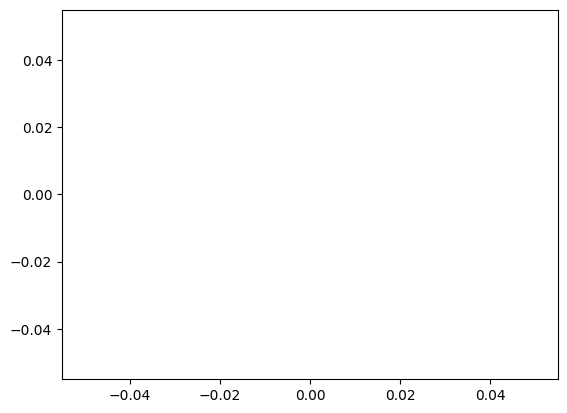

In [ ]:
CNN_acc = []
Transformer_acc = []

for img in os.listdir(TEST_imagesPath):
    print(f"Image : {img}")
    image = Image.open(os.path.join(TEST_imagesPath, img))
    image = transformer(image).unsqueeze(0)
    for snapshot in CNN_snapshots:
        model_CNN.load_state_dict(torch.load(os.path.join("/home/hvgupta/FYP/AI-Model/TrainedWeights/CNN", snapshot)))
        model_CNN.eval()
        with torch.no_grad():
            output = model_CNN(image)
            outputList = [f"{x:.2f}" for x in output.detach().cpu().numpy().flatten()]
            print(f" CNN file {snapshot} : {outputList}")
    for snapshot in Transformer_snapshots:
        model_Transformer.load_state_dict(torch.load(os.path.join("/home/hvgupta/FYP/AI-Model/TrainedWeights/Transformer", snapshot)))
        model_Transformer.eval()
        with torch.no_grad():
            output = model_Transformer(image)
            outputList = [f"{x:.2f}" for x in output.detach().cpu().numpy().flatten()]
            print(f" Transformer file {snapshot} : {outputList}")

# plt.plot(CNN_acc, label="CNN")
# plt.plot(Transformer_acc, label="Transformer")
